# Data Science for Manufacturing - Workshop 3-1: Data carpentry using Pandas

## Objectives

- Learn and use Pandas with a practical example
  - Investigate the dataset
  - Cleanse the dataset
    - Duplicates
    - Badly formed enties
    - Wrong data types
    - Missing values
  - Dataset analysis
    - Statistical disributions
    - Outlier


## 1. Introduce the dataset

![bolt dimensions from https://www.mudgefasteners.com/news/2020/12/30/how-to-measure-the-size-of-a-bolt](https://images.squarespace-cdn.com/content/v1/57fd5aa69f745699d45f362d/1609373976603-1EZYI2MGM5Z1V7I9KUQC/bolt-1.png?format=500w)

What we know for this dataset.
- Sizes should be in mm
- All values apart from IDs are floats or integers
- All IDs start with B followed by a string of integers

<br>

The goal of analysis:  
- Find out the distributions of screws in terms of different metrics
- Identify outliers

### 1.1 Loading tabular data using pandas

To begin processing data, we need to load it into Python. We can do that using the library pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

In [3]:
murl = 'https://raw.githubusercontent.com/drewsherlock/dsim_workshops/main/m.csv'
df = pd.read_csv(murl)

baurl = 'https://raw.githubusercontent.com/drewsherlock/dsim_workshops/main/ba.csv'
df = pd.read_csv(baurl)

bsurl = 'https://raw.githubusercontent.com/drewsherlock/dsim_workshops/main/bs.csv'
df = pd.read_csv(bsurl)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import csv files if using google colab
# /content/drive/MyDrive/Edinburgh/Teaching/week3/
ba_screws = pd.read_csv('/content/drive/MyDrive/Edinburgh/Teaching/week3/ba.csv')
bs_screws = pd.read_csv('/content/drive/MyDrive/Edinburgh/Teaching/week3/bs.csv')
metric_screws = pd.read_csv('/content/drive/MyDrive/Edinburgh/Teaching/week3/m.csv')

In [ ]:
# import csv files if using Noteable or Jupyter Notebook
"""ba_screws = pd.read_csv('ba.csv')
bs_screws = pd.read_csv('bs.csv')
metric_screws = pd.read_csv('m.csv')"""

"ba_screws = pd.read_csv('ba.csv')\nbs_screws = pd.read_csv('bs.csv')\nmetric_screws = pd.read_csv('m.csv')"

### 1.2 Investigating the data

Print out a subset of the datasets

In [ ]:
ba_screws.head()

,ID,thread.length,thread.pitch,head.length,diameter
0,B322,25.0,0.39,13,1.9
1,B325,16.0,0.73,13,2.1
2,B334,9.5,0.81,6.5,1.8
3,B300,100.0,0.28,13,1.8
4,B305,38.0,0.90,13,1.8


In [ ]:
bs_screws.head()

,ID,thread.length,thread.pitch,head.length,diameter
0,B195,2.0,1.81,15.5788,22.91
1,B198,25.4,2.12,12.9400,"3/4"""
2,B206,25.4,2.12,12.9540,19.05
3,B207,12.7,0.91,3.7808,5.56
4,B196,1.5,1.34,8.9488,13.16


In [ ]:
metric_screws.head()

,ID,thread.length,thread.pitch,head.length,diameter
0,B232,50,2.50,11.25,18
1,B233,30,1.00,3.75,6
2,B255,15,0.70,2.50,4
3,B218,60,0.75,3.75,6
4,B219,20,3.00,15.00,24


Find out the datatypes, shapes

In [ ]:
ba_screws.dtypes

ID                object
thread.length    float64
thread.pitch     float64
head.length       object
diameter         float64
dtype: object

In [ ]:
bs_screws.dtypes

ID                object
thread.length    float64
thread.pitch     float64
head.length      float64
diameter          object
dtype: object

In [ ]:
metric_screws.dtypes

ID                object
thread.length      int64
thread.pitch     float64
head.length      float64
diameter          object
dtype: object

In [ ]:
ba_screws.shape

(40, 5)

In [ ]:
bs_screws.shape

(23, 5)

In [ ]:
metric_screws.shape

(83, 5)

In [ ]:
ba_screws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             40 non-null     object 
 1   thread.length  40 non-null     float64
 2   thread.pitch   40 non-null     float64
 3   head.length    39 non-null     object 
 4   diameter       40 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.7+ KB


In [ ]:
bs_screws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             23 non-null     object 
 1   thread.length  22 non-null     float64
 2   thread.pitch   23 non-null     float64
 3   head.length    23 non-null     float64
 4   diameter       23 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.0+ KB


In [ ]:
metric_screws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83 non-null     object 
 1   thread.length  83 non-null     int64  
 2   thread.pitch   82 non-null     float64
 3   head.length    83 non-null     float64
 4   diameter       83 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 3.4+ KB


Check column names are the same
- Obseving is one way, but not the best way

In [ ]:
print(ba_screws.columns)

Index(['ID', 'thread.length', 'thread.pitch', 'head.length', 'diameter'], dtype='object')


In [ ]:
print(bs_screws.columns)

Index(['ID', 'thread.length', 'thread.pitch', 'head.length', 'diameter'], dtype='object')


In [ ]:
print(metric_screws.columns)

Index(['ID', 'thread.length', 'thread.pitch', 'head.length', 'diameter'], dtype='object')


In [ ]:
print(ba_screws.columns == bs_screws.columns)
print(ba_screws.columns == metric_screws.columns)

[ True  True  True  True  True]
[ True  True  True  True  True]


Observations after investigating the datasets briefly:
- Some columns have the data type of 'object' while the correct data type is numeric.
- There exists some null values.
- Three datasets cover the same perspectives of three groups of screws. They can be dealt with together.

### 1.3 Merge DataFrames in pandas

There exists different ways of combining dataframews together:

- `merge( )` for combining data on common columns or indices
- `join( )` for combining data on a key column or an index
- `concat( )` for combining DataFrames across rows or columns

Note: No need to memorise specific functions, instead, understand there are different methods to combine data and Pandas enable these methods.

[More on types of merging join, merge concat](https://realpython.com/pandas-merge-join-and-concat/)

Here, we need `concat( )` function.   
The complete function:  
`pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=None)`
- `objs` means objects to be concatenated, series or dataframes
- multiple `objs` are specified with `[ ]`
- `*` indicate that all arguments following this must be specified using keyward arguments
- `axis = 0` means by default, the concatenation is performed along axis 0. But it can be modified by specifying `axis = `
- combine dataframes with overlapping columns and return only those that are shared by passing `inner` to the `join` keyword argument
- for the left arguments, [link for other arguments in concat function](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat)

£ Axis?
- `Axis = 0` means rows, `Axis = 1` means columns
- Along the axis operations are performed
- A more intuitive translation: what changes after the operation, the rows or the columns. The concatenations above povide good examples.
[Resource for axis usage](https://railsware.com/blog/python-for-machine-learning-pandas-axis-explained/)
- In the example of `concat()` here, by default `axis=0`, this means the result of `concat()` will have more rows than the inputs. Inputs of sizes (40,6), (23,6), (83,6) will give a result with the size of (40 + 23 + 83, 6)

In [ ]:
#Concatenate pandas objects along a particular axis with optional set logic along the other axes
screws = pd.concat([ba_screws, bs_screws, metric_screws])

In [ ]:
screws.shape

(146, 6)

???: Check all three dataset are actually concatenated
? How to check by `iloc` function? What indices three datasets range over in the concatenated dataframe?

In [ ]:
screws.head()

,ID,thread.length,thread.pitch,head.length,diameter,type
0,B322,25.0,0.39,13,1.9,British Association screw
1,B325,16.0,0.73,13,2.1,British Association screw
2,B334,9.5,0.81,6.5,1.8,British Association screw
3,B300,100.0,0.28,13,1.8,British Association screw
4,B305,38.0,0.90,13,1.8,British Association screw


In [ ]:
screws.iloc[40:45, :]

,ID,thread.length,thread.pitch,head.length,diameter,type
0,B195,2.0,1.81,15.5788,22.91,British Standard Whitworth screw
1,B198,25.4,2.12,12.94,"3/4""",British Standard Whitworth screw
2,B206,25.4,2.12,12.954,19.05,British Standard Whitworth screw
3,B207,12.7,0.91,3.7808,5.56,British Standard Whitworth screw
4,B196,1.5,1.34,8.9488,13.16,British Standard Whitworth screw


In [ ]:
screws.iloc[63:67, :]

,ID,thread.length,thread.pitch,head.length,diameter,type
0,B232,50.0,2.50,11.25,18,Metric screw
1,B233,30.0,1.00,3.75,6,Metric screw
2,B255,15.0,0.70,2.5,4,Metric screw
3,B218,60.0,0.75,3.75,6,Metric screw


*How to concatenate columns?
- Select the target columns from different dataframes, and put into a `[ ]`
- Set the concat axis to 1

In [ ]:
pd.concat([ba_screws.loc[:, ['thread.length', 'thread.pitch']], bs_screws['head.length']], axis = 1)

,thread.length,thread.pitch,head.length
0,25.0,0.39,15.5788
1,16.0,0.73,12.9400
2,9.5,0.81,12.9540
3,100.0,0.28,3.7808
4,38.0,0.90,8.9488
5,9.5,0.48,7.5548
6,32.0,0.66,8.6360
7,75.0,0.21,17.2720
8,9.5,0.48,9.7172
9,100.0,0.31,8.6360


In [ ]:
pd.concat([ba_screws.loc[:, ['thread.length', 'thread.pitch']], bs_screws['head.length']], axis = 1).shape

(40, 3)

### 1.4 Rename columns and set a column as row index labels
Practice of content so far
- `rename()` function
- `set_index()` function
- `inplace` argument

In [ ]:
screws.rename(columns = {'thread.length':'thread_length', 'thread.width':'thread_width', 'head.length':'head_length' }, inplace = True)
screws.head()

,ID,thread_length,thread.pitch,head_length,diameter,type
0,B322,25.0,0.39,13,1.9,British Association screw
1,B325,16.0,0.73,13,2.1,British Association screw
2,B334,9.5,0.81,6.5,1.8,British Association screw
3,B300,100.0,0.28,13,1.8,British Association screw
4,B305,38.0,0.90,13,1.8,British Association screw


In [ ]:
# similarly now rename the thread.pitch column
screws.rename(columns = {'thread.pitch':'thread_pitch'}, inplace = True)
screws.head()

,ID,thread_length,thread_pitch,head_length,diameter,type
0,B322,25.0,0.39,13,1.9,British Association screw
1,B325,16.0,0.73,13,2.1,British Association screw
2,B334,9.5,0.81,6.5,1.8,British Association screw
3,B300,100.0,0.28,13,1.8,British Association screw
4,B305,38.0,0.90,13,1.8,British Association screw


In [ ]:
#reset index after concatenating
screws.set_index('ID', inplace=True)
screws

,thread_length,thread_pitch,head_length,diameter,type
ID,,,,,
B322,25.0,0.39,13,1.9,British Association screw
B325,16.0,0.73,13,2.1,British Association screw
B334,9.5,0.81,6.5,1.8,British Association screw
B300,100.0,0.28,13,1.8,British Association screw
B305,38.0,0.90,13,1.8,British Association screw
...,...,...,...,...,...
B276,15.0,0.60,2.1875,3.5,Metric screw
B277,40.0,0.80,3.125,5,Metric screw
B278,25.0,2.00,8.75,14,Metric screw


In [ ]:
screws.describe()

,thread_length,thread_pitch
count,145.000000,145.000000
mean,30.381724,1.267931
std,20.238055,0.786106
min,1.500000,0.210000
25%,15.000000,0.600000
50%,25.400000,1.000000
75%,40.000000,2.000000
max,100.000000,3.180000


In [ ]:
screws.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, B322 to B237
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   thread_length  145 non-null    float64
 1   thread_pitch   145 non-null    float64
 2   head_length    145 non-null    object 
 3   diameter       146 non-null    object 
 4   type           146 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.8+ KB


### 1.5 ££ Selection by boolean operation

When dealing with dataframes, a common task is to select rows with a column's value satisfying some criteria. For example, we want to select all screws with thread length bigger than 50.

To select rows based on boolean conditions:
- a series of boolean results regarding each row. These boolean values label whether a row satisfies the criteria.
- input the series of boolean results into the dataframe to select

In [ ]:
screws['thread_length'] > 50  # this gives us whether thread_length > 50 for each row

ID
B322    False
B325    False
B334    False
B300     True
B305    False
        ...  
B276    False
B277    False
B278    False
B280    False
B237    False
Name: thread_length, Length: 146, dtype: bool

In [ ]:
type(screws['thread_length'] > 50)

pandas.core.series.Series

In [ ]:
screws[screws['thread_length'] > 50] # we can take previous expression and apply it to get a slice of the data frame where the criteria is true

,thread_length,thread_pitch,head_length,diameter,type
ID,,,,,
B300,100.0,0.28,13,1.8,British Association screw
B330,75.0,0.21,6.5,1.5,British Association screw
B332,100.0,0.31,13,2.3,British Association screw
B335,63.0,0.59,6.5,1.8,British Association screw
B314,100.0,0.90,6.5,2.2,British Association screw
B308,75.0,0.66,13,1.9,British Association screw
B323,75.0,0.90,6.5,1.8,British Association screw
B324,75.0,0.48,6.5,1.8,British Association screw
B327,63.0,0.59,9.5,1.9,British Association screw


## 2. Find and deal with duplicate values

### 2.1 Let's deal with duplicate IDs first

(An example of boolean operations)

The task to remove duplicates from a column:
- Find out how many unique indices there are
- Select rows with unique indices and remove duplicates

Relevant methods:
- `unique()`: return unique values
- `duplicated(keep = 'first')`: return boolean values denoting duplicate rows
    - `keep = 'first'` : Mark duplicates as True except for the first occurrence.

    - `keep = 'last'` : Mark duplicates as True except for the last occurrence.

    - `keep = False` : Mark all duplicates as True.

In [ ]:
### first though might be using the unique method
### but the results are all the unique values, it does not analyse how many duplicates there are
ids = screws.index.unique()
ids

Index(['B322', 'B325', 'B334', 'B300', 'B305', 'b329', 'B333', 'B330', 'B331',
       'B332',
       ...
       'B217', 'B228', 'B229', 'B230', 'B231', 'B275', 'B276', 'B277', 'B278',
       'B280'],
      dtype='object', name='ID', length=143)

In [ ]:
### to check how many duplicated indices are there, use duplicated() method
screws.index.duplicated().sum() # By adding sum () you get the sum of the duplicate values. Without keep=False only the second dupe row is marked.

3

In [ ]:
### Check for duplicates in column ID using the 'duplicated' method which returns boolean values.
screws.index.duplicated(keep=False)    # (keep=False tells it to show both rows for a duplicate pair of rows)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [ ]:
screws[screws.index.duplicated(keep=False)]  # (keep=False tells it to show both rows for a duplicate pair of rows)

,thread_length,thread_pitch,head_length,diameter,type
ID,,,,,
B219,20.0,3.0,15.0,24,Metric screw
B289,40.0,1.0,3.75,6,Metric screw
B237,35.0,2.5,13.75,22,Metric screw
B219,20.0,3.0,15.0,24,Metric screw
B289,40.0,1.0,3.75,6,Metric screw
B237,35.0,2.5,13.75,22,Metric screw


In [ ]:
screws[screws.index.duplicated(keep= 'first')]  # (keep=False tells it to show both rows for a duplicate pair of rows)

,thread_length,thread_pitch,head_length,diameter,type
ID,,,,,
B219,20.0,3.0,15.0,24,Metric screw
B289,40.0,1.0,3.75,6,Metric screw
B237,35.0,2.5,13.75,22,Metric screw


In [ ]:
### copy the cleaned data to another variable, method 1
screws_copy1 = screws[~screws.index.duplicated(keep='first')]

In [ ]:
### copy the cleaned data to another variable, method 2
screws_copy2 = screws[~screws.index.duplicated(keep='first')].copy()

£££ Column selection and row selection creates a view of the original data.
- In Pandas, some operations copy a shallow copy of the original data, some operations create a deep copy of original data. This is because of dataframes are mutable. Whether creating a view or a deep copy is consistent with
  - `list_copy1 = list`
  - `list_copy2 = list[:]`

In [ ]:
screws = screws[~screws.index.duplicated(keep='first')]

In [ ]:
screws.index.duplicated(keep=False)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
screws[screws.index.duplicated(keep=False)]

,thread_length,thread_pitch,head_length,diameter,type
ID,,,,,


### 2.2 Next deal with duplicate rows

In [ ]:
screws.duplicated(keep=False) # is the row duplicated? (keep=False tells it to show both rows for a duplicate pair of rows)

ID
B322    False
B325    False
B334    False
B300    False
B305    False
        ...  
B275    False
B276     True
B277    False
B278    False
B280    False
Length: 143, dtype: bool

In [ ]:
screws.duplicated(keep=False).sum()

23

In [ ]:
screws.duplicated().sum()

12

? What does 12 mean out of 23?

In [ ]:
### we can display all duplicate rows
### but the results are not easy for observation
screws[screws.duplicated(keep=False)] # slice the dataframe for duplicate rows. We can assume that screws with the same measurements but different IDs refer to the same screw but registered twice. It could be that these are two different entries which is why it is important to know and understand your data before processing.

,thread_length,thread_pitch,head_length,diameter,type
ID,,,,,
b329,9.5,0.48,9.5,2.2,British Association screw
B329,9.5,0.48,9.5,2.2,British Association screw
b205,1.5,2.12,9.7172,14.29,British Standard Whitworth screw
B205,1.5,2.12,9.7172,14.29,British Standard Whitworth screw
B255,15.0,0.70,2.5,4,Metric screw
B220,50.0,1.50,11.25,18,Metric screw
B222,30.0,1.50,6.25,10,Metric screw
B224,30.0,1.50,6.25,10,Metric screw
B226,15.0,0.60,2.1875,3.5,Metric screw


In [ ]:
### we can use sort_values to better organise the results
screws[screws.duplicated(keep=False)].sort_values(by = ['thread_length', 'thread_pitch', 'head_length'])

,thread_length,thread_pitch,head_length,diameter,type
ID,,,,,
b205,1.5,2.12,9.7172,14.29,British Standard Whitworth screw
B205,1.5,2.12,9.7172,14.29,British Standard Whitworth screw
b329,9.5,0.48,9.5,2.2,British Association screw
B329,9.5,0.48,9.5,2.2,British Association screw
B226,15.0,0.60,2.1875,3.5,Metric screw
B276,15.0,0.60,2.1875,3.5,Metric screw
B255,15.0,0.70,2.5,4,Metric screw
B245,15.0,0.70,2.5,4,Metric screw
B239,15.0,1.50,13.75,22,Metric screw


In [ ]:
# Remove duplicate rows
screws.drop_duplicates(inplace=True)

In [ ]:
# see what happens to a shallow copy
screws_copy1.drop_duplicates(inplace=True)

<ipython-input-147-092ba6a2f6b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screws_copy1.drop_duplicates(inplace=True)


£££ A warning will showup if you try to modify a shallow copy/ view of the original data. This is very dangerous and causing the warning is because:
- What you might want to do is only to change a shallow copy of the original data
- But what actually happens is not only the shallow copy changes, the original data also changes

In [ ]:
# see what happens to a deep copy
screws_copy2.drop_duplicates(inplace=True)

In [ ]:
screws.duplicated().sum()

0

In [ ]:
### create a few deep copies for later uses
screws2 = screws.copy()
screws3 = screws.copy()

## 3. Let's deal with badly formed IDs
- Find out rows with bad indices
- Modify the bad indices

In [ ]:
sorted(screws.index)

['B195',
 'B196',
 'B197',
 'B198',
 'B199',
 'B200',
 'B201',
 'B202',
 'B203',
 'B204',
 'B206',
 'B207',
 'B208',
 'B209',
 'B210',
 'B211',
 'B212',
 'B213',
 'B214',
 'B215',
 'B216',
 'B217',
 'B218',
 'B219',
 'B220',
 'B221',
 'B222',
 'B223',
 'B225',
 'B226',
 'B227',
 'B228',
 'B229',
 'B230',
 'B231',
 'B232',
 'B233',
 'B234',
 'B235',
 'B236',
 'B237',
 'B238',
 'B239',
 'B240',
 'B241',
 'B242',
 'B243',
 'B244',
 'B246',
 'B247',
 'B249',
 'B250',
 'B251',
 'B252',
 'B253',
 'B254',
 'B255',
 'B256',
 'B257',
 'B258',
 'B259',
 'B260',
 'B261',
 'B263',
 'B264',
 'B265',
 'B266',
 'B267',
 'B268',
 'B269',
 'B270',
 'B271',
 'B272',
 'B273',
 'B274',
 'B275',
 'B277',
 'B278',
 'B279',
 'B280',
 'B281',
 'B283',
 'B284',
 'B286',
 'B287',
 'B289',
 'B290',
 'B291',
 'B292',
 'B294',
 'B296',
 'B297',
 'B298',
 'B299',
 'B300',
 'B301',
 'B302',
 'B303',
 'B304',
 'B305',
 'B306',
 'B307',
 'B308',
 'B309',
 'B310',
 'B311',
 'B312',
 'B313',
 'B314',
 'B315',
 'B316',
 

Observe that there are indices that start with 'b', while the majority starts with 'B'.

### 3.1 `map( )` and `lambda( )`

`map( )` in pandas: `dataframe.map(function)`
- apply the function to every element of the dataframe
- [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html#pandas.DataFrame.map)


`map( )` in built-in functions of Python: `map(function, iterable)`
- iterable: simple examples are sequence type variables, lists etc.
- apply the function to every element of the iteratble
- [Python documentation](https://docs.python.org/3/library/functions.html#map)

`lambda arguments : expression` function is a one-line function definition, it's used where the function is short and no need for 'def'

![Img lambda func[link text](https://)tion](https://www.softwaretestinghelp.com/wp-content/qa/uploads/2021/02/fig1_lambda-expression.jpg)

- the arguments are claims of variables
- the expression define an operation of the variables

### 3.2 Method 1: step-by-step method

Create a function that gives a list of boolean values regarding whether the ID starts with 'B'

In [ ]:
def start_with_B(x):
  # input: an index of the dataset, the ID of a part
  # output: boolean result
  return x.startswith('B')

Test the function with a random input

In [ ]:
start_with_B(screws.index[0])

True

In [ ]:
screws.index.map(start_with_B)

Index([ True,  True,  True,  True,  True, False,  True,  True,  True,  True,
       ...
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
      dtype='bool', name='ID', length=131)

In [ ]:
screws.index.map(start_with_B).value_counts()

True     129
False      2
Name: ID, dtype: int64

Add this created list of boolean values as a column to the dataframe

In [ ]:
screws['ID_starts_with_B'] = screws.index.map(start_with_B)

In [ ]:
screws.head()

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B
ID,,,,,,
B322,25.0,0.39,13,1.9,British Association screw,True
B325,16.0,0.73,13,2.1,British Association screw,True
B334,9.5,0.81,6.5,1.8,British Association screw,True
B300,100.0,0.28,13,1.8,British Association screw,True
B305,38.0,0.90,13,1.8,British Association screw,True


Locate the rows with bad IDs

In [ ]:
screws[~screws['ID_starts_with_B']]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B
ID,,,,,,
b329,9.5,0.48,9.5,2.2,British Association screw,False
b205,1.5,2.12,9.7172,14.29,British Standard Whitworth screw,False


In [ ]:
screws.rename(index= {'b329':'B329'}, inplace=True)
screws.loc['B329']

thread_length                             9.5
thread_pitch                             0.48
head_length                               9.5
diameter                                  2.2
type                British Association screw
ID_starts_with_B                        False
Name: B329, dtype: object

In [ ]:
screws.rename(index= {'b205':'B205'}, inplace=True)
screws.loc['B205']

thread_length                                    1.5
thread_pitch                                    2.12
head_length                                   9.7172
diameter                                       14.29
type                British Standard Whitworth screw
ID_starts_with_B                               False
Name: B205, dtype: object

Vefity that there are no rows which does not start with 'B'

In [ ]:
screws.index.map(start_with_B).value_counts()

True    131
Name: ID, dtype: int64

### * 3.3 Method 2: Nested Pythonic method

In [ ]:
screws2['ID_starts_with_B'] = list(
    map(lambda x: x.startswith('B'), screws2.index))
# lambda function is a one-line function definition, it's used where the function is short and no need for 'def'
# lambda function here tells whether an index starts with 'B'
# map applies the lambda function to all the items in an input_list


# printing new data frame
screws2

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B
ID,,,,,,
B322,25.0,0.39,13,1.9,British Association screw,True
B325,16.0,0.73,13,2.1,British Association screw,True
B334,9.5,0.81,6.5,1.8,British Association screw,True
B300,100.0,0.28,13,1.8,British Association screw,True
B305,38.0,0.90,13,1.8,British Association screw,True
...,...,...,...,...,...,...
B231,35.0,1.25,6.25,10,Metric screw,True
B275,60.0,2.00,15.0,24,Metric screw,True
B277,40.0,0.80,3.125,5,Metric screw,True


In [ ]:
screws2['ID_starts_with_B'].value_counts()

True     129
False      2
Name: ID_starts_with_B, dtype: int64

In [ ]:
screws2[~screws2['ID_starts_with_B']]   # ~ means NOT so this shows rows where ID_starts_with_B is false

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B
ID,,,,,,
b329,9.5,0.48,9.5,2.2,British Association screw,False
b205,1.5,2.12,9.7172,14.29,British Standard Whitworth screw,False


In [ ]:
screws2.rename(index= {'b329':'B329'}, inplace=True)
screws2.rename(index= {'b205':'B205'}, inplace=True)

In [ ]:
### check specific rows to see the rename method actually did what we want, method 1
screws2.loc['B205']

thread_length                                    1.5
thread_pitch                                    2.12
head_length                                   9.7172
diameter                                       14.29
type                British Standard Whitworth screw
ID_starts_with_B                               False
Name: B205, dtype: object

In [ ]:
screws2.loc['B329']

thread_length                             9.5
thread_pitch                             0.48
head_length                               9.5
diameter                                  2.2
type                British Association screw
ID_starts_with_B                        False
Name: B329, dtype: object

In [ ]:
### check specific rows to see the rename method actually did what we want, method 2
screws2.sort_values(['ID'])[95:]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B
ID,,,,,,
B300,100.0,0.28,13,1.8,British Association screw,True
B301,32.0,1.00,6.5,2.2,British Association screw,True
B302,16.0,0.43,13,2.1,British Association screw,True
B303,9.5,0.73,13,1.7,British Association screw,True
B304,16.0,1.00,9.5,1.8,British Association screw,True
B305,38.0,0.90,13,1.8,British Association screw,True
B306,38.0,0.48,"1""",2.5,British Association screw,True
B307,25.0,0.21,13,2.0,British Association screw,True
B308,75.0,0.66,13,1.9,British Association screw,True


## 4. Correct data types

- `dataframe.dtypes()` check data types
- `dataframe.astypes()` change data types to target types

In [ ]:
screws['ID'] = screws.index.astype('string') # let's add back an ID column as a string

### 4.1 Fix datatype for one column

Step 1: observe the datatypes of different columns to check if there is any problems

In [ ]:
screws.dtypes

thread_length       float64
thread_pitch        float64
head_length          object
diameter             object
type                 object
ID_starts_with_B       bool
ID                   string
dtype: object

In [ ]:
#'# verifu the type column is string type
screws['type'].map(type).value_counts()

<class 'str'>    131
Name: type, dtype: int64

In [ ]:
#'# modify the type column to string type
screws_copy2['type'].astype('string')

ID
B322    British Association screw
B325    British Association screw
B334    British Association screw
B300    British Association screw
B305    British Association screw
                  ...            
B231                 Metric screw
B275                 Metric screw
B277                 Metric screw
B278                 Metric screw
B280                 Metric screw
Name: type, Length: 131, dtype: string

We know that 'thread_length', 'thread_pitch','head_length', and 'diameter' are supposed to be numeric types.  

In [ ]:
screws.head()

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B322,25.0,0.39,13,1.9,British Association screw,True,B322
B325,16.0,0.73,13,2.1,British Association screw,True,B325
B334,9.5,0.81,6.5,1.8,British Association screw,True,B334
B300,100.0,0.28,13,1.8,British Association screw,True,B300
B305,38.0,0.90,13,1.8,British Association screw,True,B305


Step 2: Find out what datatypes are there in a column, and decide what to do

In [ ]:
screws['diameter'].map(type)

ID
B322    <class 'float'>
B325    <class 'float'>
B334    <class 'float'>
B300    <class 'float'>
B305    <class 'float'>
             ...       
B231      <class 'str'>
B275      <class 'str'>
B277      <class 'str'>
B278      <class 'str'>
B280      <class 'str'>
Name: diameter, Length: 131, dtype: object

In [ ]:
screws['diameter'].map(type).value_counts()

<class 'str'>      92
<class 'float'>    39
Name: diameter, dtype: int64

Step 3: The rows with 'float' type are fine, need to correct datatypes for the rows with 'str' type:
- find out how the string values are like

- use the function `pd.to_numeric(obj, errors = 'raise')`
    - `obj` means to transfer to numeric values for these objects
    - `errors` specify what to do with invalid cases
    - `errors = 'raise'`: raise an exception
    - `errors = 'ignore'`: return the input
    - `errors = 'coerce'`: set invalid cases as NaN


In [ ]:
### the first step to use boolean operation to select rows: generate a series of boolean labels
find_str = screws.diameter.map(type)==str
find_str

ID
B322    False
B325    False
B334    False
B300    False
B305    False
        ...  
B231     True
B275     True
B277     True
B278     True
B280     True
Name: diameter, Length: 131, dtype: bool

In [ ]:
### the first step to use boolean operation to select rows: use boolean labels to select
screws[find_str]   # rows where diameter is a string

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B195,2.0,1.81,15.5788,22.91,British Standard Whitworth screw,True,B195
B198,25.4,2.12,12.94,"3/4""",British Standard Whitworth screw,True,B198
B206,25.4,2.12,12.954,19.05,British Standard Whitworth screw,True,B206
B207,12.7,0.91,3.7808,5.56,British Standard Whitworth screw,True,B207
B196,1.5,1.34,8.9488,13.16,British Standard Whitworth screw,True,B196
...,...,...,...,...,...,...,...
B231,35.0,1.25,6.25,10,Metric screw,True,B231
B275,60.0,2.00,15.0,24,Metric screw,True,B275
B277,40.0,0.80,3.125,5,Metric screw,True,B277


In [ ]:
### to fix the string diameters
### let's try to force the creation of a diameter_float column with values as a float
screws['diameter_float'] = pd.to_numeric(screws['diameter'], errors='coerce')

Step 4: Check for invalid cases generated from `errors = coerce` and fix

In [ ]:
### if there is any that haven't been converted, they should be set as NaN
screws[screws['diameter_float'].isnull()]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID,diameter_float
ID,,,,,,,,
B198,25.4,2.12,12.94,"3/4""",British Standard Whitworth screw,True,B198,NaN
B202,1.5,1.59,8.636,"1/2""",British Standard Whitworth screw,True,B202,NaN
B230,25.0,0.50,2.5,h,Metric screw,True,B230,NaN


In [ ]:
### let's fix the inches: convert inch to mm
screws.loc['B198', 'diameter_float'] = 25.4 * 3 / 4
screws.loc['B202', 'diameter_float'] = 25.4 * 1 / 2

In [ ]:
screws.loc[['B198', 'B202']]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID,diameter_float
ID,,,,,,,,
B198,25.4,2.12,12.94,"3/4""",British Standard Whitworth screw,True,B198,19.05
B202,1.5,1.59,8.636,"1/2""",British Standard Whitworth screw,True,B202,12.70


In [ ]:
### for the diameter of value h, drop this row
screws.drop(index='B230', inplace = True)

Step 5: Wrap up

In [ ]:
### now let's replace diameter column with our new column
screws['diameter'] = screws['diameter_float']
screws.head()

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID,diameter_float
ID,,,,,,,,
B322,25.0,0.39,13,1.9,British Association screw,True,B322,1.9
B325,16.0,0.73,13,2.1,British Association screw,True,B325,2.1
B334,9.5,0.81,6.5,1.8,British Association screw,True,B334,1.8
B300,100.0,0.28,13,1.8,British Association screw,True,B300,1.8
B305,38.0,0.90,13,1.8,British Association screw,True,B305,1.8


In [ ]:
screws.drop(['diameter_float'], axis=1, inplace=True)
screws.head()

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B322,25.0,0.39,13,1.9,British Association screw,True,B322
B325,16.0,0.73,13,2.1,British Association screw,True,B325
B334,9.5,0.81,6.5,1.8,British Association screw,True,B334
B300,100.0,0.28,13,1.8,British Association screw,True,B300
B305,38.0,0.90,13,1.8,British Association screw,True,B305


Check if data types are floats, if not change the type to floats

In [ ]:
screws.dtypes

thread_length       float64
thread_pitch        float64
head_length          object
diameter            float64
type                 object
ID_starts_with_B       bool
ID                   string
dtype: object

### ??? 4.2 Excercise: fix datatype for 'head_length' column

In [ ]:

screws['head_length_float'] = pd.to_numeric(screws['head_length'], errors='coerce')
screws[screws['head_length_float'].isnull()]

,thread_length,thread_pitch,head_length,diameter,type,ID,head_length_float
ID,,,,,,,
B310,25.0,0.23,NaN,2.0,British Association screw,B310,NaN
B306,38.0,0.48,"1""",2.5,British Association screw,B306,NaN


In [ ]:
screws['head_length']=screws['head_length_float']
screws.drop(['head_length_float'], axis=1, inplace=True)
screws

,thread_length,thread_pitch,head_length,diameter,type,ID
ID,,,,,,
B322,25.0,0.39,13.000,1.9,British Association screw,B322
B325,16.0,0.73,13.000,2.1,British Association screw,B325
B334,9.5,0.81,6.500,1.8,British Association screw,B334
B300,100.0,0.28,13.000,1.8,British Association screw,B300
B305,38.0,0.90,13.000,1.8,British Association screw,B305
...,...,...,...,...,...,...
B231,35.0,1.25,6.250,10.0,Metric screw,B231
B275,60.0,2.00,15.000,24.0,Metric screw,B275
B277,40.0,0.80,3.125,5.0,Metric screw,B277


## 5. Dealing with missing values
`dataframe.isnull( )` or `dataframe.isna( )` are equivalent
- They detect missing values, and return a mask of boolean values for each element in the dataframe

`dataframe.any(*, axis=0)`
- returns whether any element is True, over the defined axis


In [ ]:
# find the missing values in the dataset
missing_data = screws.isnull()
missing_data.head(10)

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B322,False,False,False,False,False,False,False
B325,False,False,False,False,False,False,False
B334,False,False,False,False,False,False,False
B300,False,False,False,False,False,False,False
B305,False,False,False,False,False,False,False
B329,False,False,False,False,False,False,False
B333,False,False,False,False,False,False,False
B330,False,False,False,False,False,False,False
B331,False,False,False,False,False,False,False


In [ ]:
missing_data.any(axis=0)

thread_length        True
thread_pitch         True
head_length          True
diameter            False
type                False
ID_starts_with_B    False
ID                  False
dtype: bool

In [ ]:
missing_data.any(axis=1)

ID
B322    False
B325    False
B334    False
B300    False
B305    False
        ...  
B231    False
B275    False
B277    False
B278    False
B280    False
Length: 130, dtype: bool

? If we want to see which rows have missing values, how should we set `axis =`

In [ ]:
# let's see which rows have a problem
screws[missing_data.any(axis=1)]  # remember you can issue the command missing_data.any?  to find out about more about the 'any' function

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B310,25.0,0.23,NaN,2.00,British Association screw,True,B310
B199,NaN,1.81,7.5548,11.11,British Standard Whitworth screw,True,B199
B242,10.0,NaN,15.0,24.00,Metric screw,True,B242


### 5.1 Replace using mean values for one column

In [ ]:
avg_thread_len = screws['thread_length'].astype('float').mean(axis=0)
print('Average of thread lengths:', avg_thread_len)

Average of thread lengths: 30.615116279069767


In [ ]:
screws['thread_length'].replace(np.nan, avg_thread_len, inplace=True)

In [ ]:
#screws[missing_data.any(axis=1)]
screws.isnull().any(axis=0)

thread_length       False
thread_pitch         True
head_length          True
diameter            False
type                False
ID_starts_with_B    False
ID                  False
dtype: bool

### 5.2 Replace using frequencies for other columns

In [ ]:
### find the most frequent value, method 1: See which values are pesent in the column
screws['thread_pitch'].value_counts()

2.00    13
1.50    12
1.00    12
2.50     9
0.73     6
0.35     5
1.25     5
0.25     5
0.50     4
0.48     4
1.59     4
2.12     4
1.81     4
1.34     3
3.00     3
0.23     3
0.21     3
0.66     3
0.90     3
0.75     2
0.59     2
3.18     2
0.28     2
0.80     2
0.91     2
0.40     1
0.60     1
0.39     1
0.70     1
0.79     1
2.31     1
1.06     1
0.53     1
0.43     1
0.31     1
0.81     1
0.45     1
Name: thread_pitch, dtype: int64

In [ ]:
### find the most frequent value, method 2: get most common value of thread_pitch
most_freq = screws['thread_pitch'].value_counts().idxmax()
most_freq

2.0

In [ ]:
### replace the missing value by the most frequent
screws['thread_pitch'].replace(np.nan, most_freq, inplace=True)

In [ ]:
screws.isnull().any(axis=0)

In [ ]:
screws[screws.isnull().any(axis=1)]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B310,25.0,0.23,NaN,2.0,British Association screw,True,B310


In [ ]:
# Now do the same for head_length
most_freq = screws['head_length'].value_counts().idxmax()
screws['head_length'].replace(np.nan, most_freq, inplace=True)

In [ ]:
screws.isnull().any(axis = 0)

thread_length       False
thread_pitch        False
head_length         False
diameter            False
type                False
ID_starts_with_B    False
ID                  False
dtype: bool

### 5.3 Drop data with missing values
If the stategy to deal with rows with missing data is to drop them. There are two options:
- `dataframe.drop(index=, inplace = True)`: drop named rows (can also be applied to drop columns)
- `dataframe.dropna(axis = 0, how ='any', subset = None, inplace = True)`: drop any row with any/all NaN values
  - `axis` specifies whether drop rows or columns
  - `how` specifies the condition is 'if any NaN exists' or 'if all of the values of Nan'
  - `subset` specifies which columns are of interest, for exampe, `subset = [thread_length, diameter]`


In [ ]:
### examples of drop function back in section 4.1


# example of code: (do not run)

# screws.drop(index='B230', inplace = True)
# screws.drop(axis = 0, how = 'any')

In [ ]:
### an example of dropna function
missing_sc2 = screws2.isnull()
screws2[missing_sc2.any(axis = 1)]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B
ID,,,,,,
B310,25.0,0.23,NaN,2.0,British Association screw,True
B199,NaN,1.81,7.5548,11.11,British Standard Whitworth screw,True
B242,10.0,NaN,15.0,24,Metric screw,True


In [ ]:
screws2.dropna(inplace = True)

In [ ]:
screws2.isnull().any()

thread_length       False
thread_pitch        False
head_length         False
diameter            False
type                False
ID_starts_with_B    False
dtype: bool

## 6. Identify outliers

- Statistical methods:
  - Simple sorting
  - Z-scores
  - IQR
- Visualisation methods:
  - Box plot
  - Histogram plot

### 6.1 Simple sorting
Cut out the extremes

In [ ]:
screws['thread_length'].value_counts()

25.000000     13
30.000000     10
40.000000      9
50.000000      8
15.000000      8
10.000000      7
35.000000      7
9.500000       7
20.000000      6
60.000000      6
38.000000      6
1.500000       4
75.000000      4
25.400000      4
12.700000      4
16.000000      4
100.000000     3
32.000000      3
63.000000      3
2.000000       3
19.000000      3
6.350000       2
50.800000      2
38.100000      1
13.000000      1
30.615116      1
19.050000      1
Name: thread_length, dtype: int64

In [ ]:
screws['thread_length'].unique()

array([ 25.        ,  16.        ,   9.5       , 100.        ,
        38.        ,  32.        ,  75.        ,  63.        ,
        13.        ,  19.        ,   2.        ,  25.4       ,
        12.7       ,   1.5       ,  30.61511628,  50.8       ,
         6.35      ,  19.05      ,  38.1       ,  50.        ,
        30.        ,  15.        ,  60.        ,  20.        ,
        40.        ,  10.        ,  35.        ])

In [ ]:
np.sort(screws['thread_length'].unique())

array([  1.5       ,   2.        ,   6.35      ,   9.5       ,
        10.        ,  12.7       ,  13.        ,  15.        ,
        16.        ,  19.        ,  19.05      ,  20.        ,
        25.        ,  25.4       ,  30.        ,  30.61511628,
        32.        ,  35.        ,  38.        ,  38.1       ,
        40.        ,  50.        ,  50.8       ,  60.        ,
        63.        ,  75.        , 100.        ])

In [ ]:
# a for loop to print out value_counts for all columns
for column in screws.columns:
    print(column)
    print(screws[column].value_counts())
    print('')

thread_length
25.000000     13
30.000000     10
40.000000      9
50.000000      8
15.000000      8
10.000000      7
35.000000      7
9.500000       7
20.000000      6
60.000000      6
38.000000      6
1.500000       4
75.000000      4
25.400000      4
12.700000      4
16.000000      4
100.000000     3
32.000000      3
63.000000      3
2.000000       3
19.000000      3
6.350000       2
50.800000      2
38.100000      1
13.000000      1
30.615116      1
19.050000      1
Name: thread_length, dtype: int64

thread_pitch
2.00    14
1.50    12
1.00    12
2.50     9
0.73     6
0.35     5
1.25     5
0.25     5
0.50     4
0.48     4
1.59     4
2.12     4
1.81     4
1.34     3
3.00     3
0.23     3
0.21     3
0.66     3
0.90     3
0.75     2
0.59     2
3.18     2
0.28     2
0.80     2
0.91     2
0.40     1
0.60     1
0.39     1
0.70     1
0.79     1
2.31     1
1.06     1
0.53     1
0.43     1
0.31     1
0.81     1
0.45     1
Name: thread_pitch, dtype: int64

head_length
6.5        16
13         1

In [ ]:
# Find the rows containing outliers in the thread_length column
screws[screws['thread_length'] >= 100]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B300,100.0,0.28,13,1.8,British Association screw,True,B300
B332,100.0,0.31,13,2.3,British Association screw,True,B332
B314,100.0,0.90,6.5,2.2,British Association screw,True,B314


In [ ]:
# identify the row indices
screws[screws['thread_length'] >= 100].index

Index(['B300', 'B332', 'B314'], dtype='object', name='ID')

In [ ]:
screws[screws['thread_length'] < 5]

,thread_length,thread_pitch,head_length,diameter,type,ID
ID,,,,,,
B195,2.0,1.81,15.5788,22.91,British Standard Whitworth screw,B195
B196,1.5,1.34,8.9488,13.16,British Standard Whitworth screw,B196
B202,1.5,1.59,8.6360,12.70,British Standard Whitworth screw,B202
B203,2.0,1.06,3.2368,4.76,British Standard Whitworth screw,B203
B200,2.0,3.18,17.2720,25.40,British Standard Whitworth screw,B200
B208,1.5,1.81,17.9792,26.44,British Standard Whitworth screw,B208


### 6.2 IQR (interquartile range)

- Normal distribution  
![normal distribution](https://www.mathsisfun.com/data/images/normal-distrubution-large.svg)

- The box represents the IQR, the middle 50% of the data.  

![IQR explanation based on normar distribution](https://www.researchgate.net/publication/362595959/figure/fig3/AS:11431281078749803@1660236160899/Interquartile-range-and-empirical-rule-of-a-normal-distribution.png)

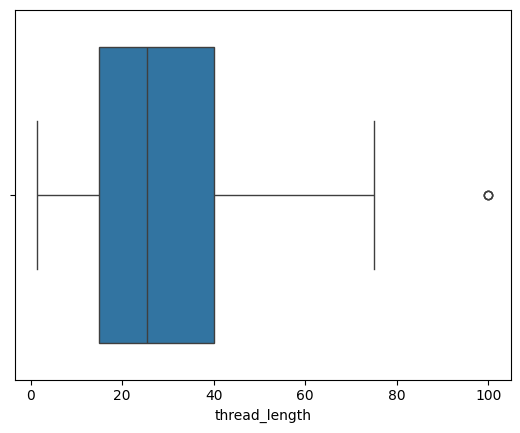

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x=screws['thread_length'])

# Show the plot
plt.show()

### 6.3 Z-score
- Use mean and standard deviation to locate outliers

In [ ]:
from scipy import stats
z_score = stats.zscore(screws['thread_length'])

In [ ]:
threshold = 3

<Axes: xlabel='thread_length', ylabel='Count'>

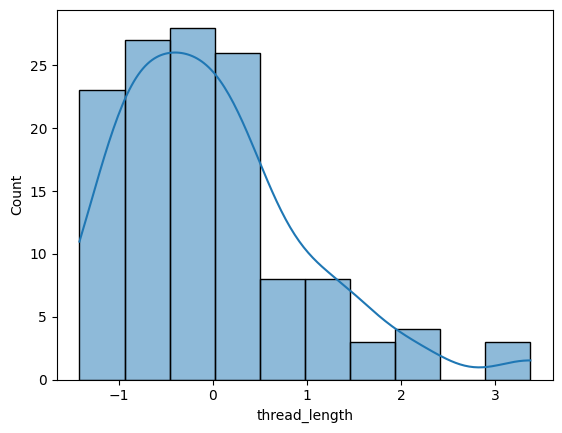

In [ ]:
sns.histplot(z_score, kde=True)

In [ ]:
screws[abs(z_score) > threshold]

,thread_length,thread_pitch,head_length,diameter,type,ID_starts_with_B,ID
ID,,,,,,,
B300,100.0,0.28,13,1.8,British Association screw,True,B300
B332,100.0,0.31,13,2.3,British Association screw,True,B332
B314,100.0,0.90,6.5,2.2,British Association screw,True,B314


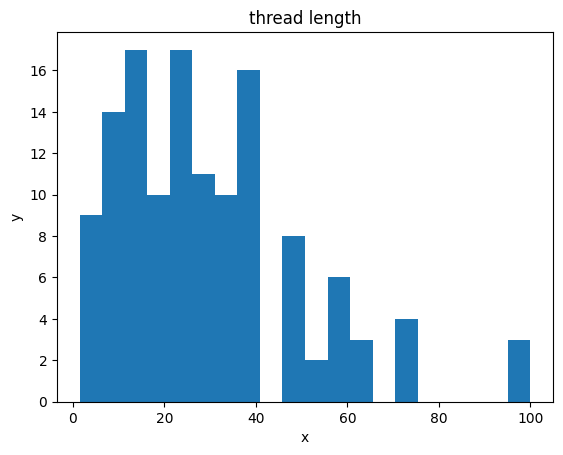

In [ ]:
plt.hist(screws['thread_length'], bins=20)

#set axis
plt.xlabel('x')
plt.ylabel('y')
plt.title('thread length')
plt.show()